# Python Programming - In-Class Assignment


Step 0: Import necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'tips' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Task 1: Calculate overall survival rate

In [3]:
# Calculate overall survival rate
overall_survival_rate = titanic_data['survived'].mean() * 100
print(f'Overall Survival Rate: {overall_survival_rate:.2f}%')

Overall Survival Rate: 38.38%


Task 2: Calculate and print the survival rates by gender ('sex'), passenger class ('class'), and embarkation point ('embarked').



Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


<Axes: xlabel='sex'>

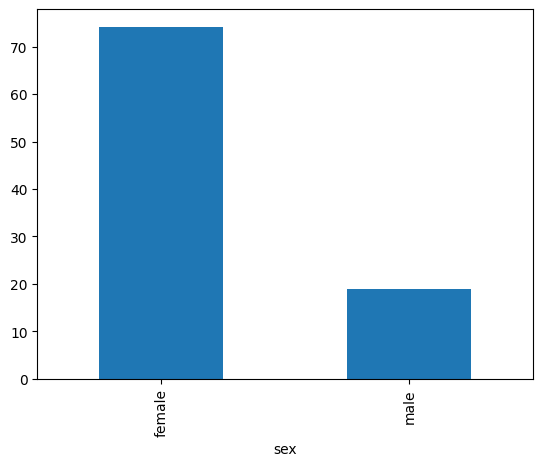

In [4]:
# Calculate survival rates by gender
survival_rate_by_gender = titanic_data.groupby('sex')['survived'].mean() * 100
print('Survival Rate by Gender:')
print(survival_rate_by_gender)

survival_rate_by_gender.plot(kind='bar')

Survival Rate by Passenger Class:
class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


<ipython-input-5-3206fe0dab89>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_class = titanic_data.groupby('class')['survived'].mean() * 100


<Axes: xlabel='class'>

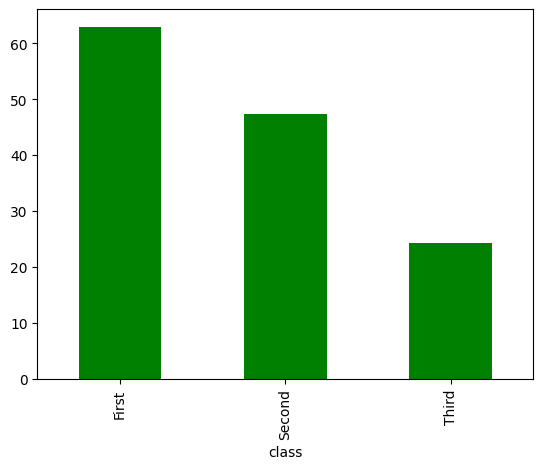

In [5]:
# Calculate survival rates by passenger class
survival_rate_by_class = titanic_data.groupby('class')['survived'].mean() * 100
print('Survival Rate by Passenger Class:')
print(survival_rate_by_class)

survival_rate_by_class.plot(kind='bar', color='green')

Survival Rate by Embarkation Point:
embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


<Axes: xlabel='embarked'>

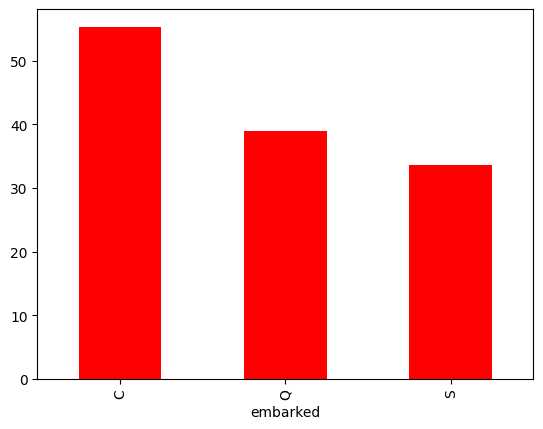

In [6]:
# Calculate survival rates by embarkation point
survival_rate_by_embarked = titanic_data.groupby('embarked')['survived'].mean() * 100
print('Survival Rate by Embarkation Point:')
print(survival_rate_by_embarked)

survival_rate_by_embarked.plot(kind='bar', color='red')

Task 3: Calculate the survival rate by age group (e.g., under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

Survival Rate by Age Group:
age_group
Child          57.971014
Teen           38.181818
Adult          39.740260
Middle-Aged    39.062500
Senior         22.727273
Name: survived, dtype: float64


<ipython-input-7-b8a4d77b201b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean() * 100


<Axes: xlabel='age_group'>

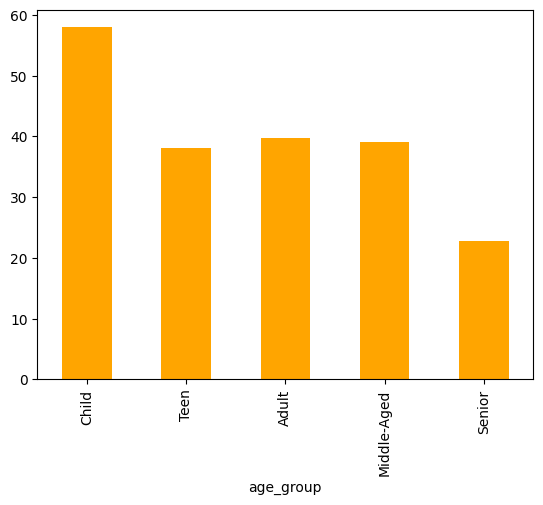

In [7]:
# Manipulate age groups
bins = [0, 12, 20, 40, 60, np.inf]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Calculate survival rates by age group
survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean() * 100
print('Survival Rate by Age Group:')
print(survival_rate_by_age_group)

survival_rate_by_age_group.plot(kind='bar', color='orange')


Task 4: Create a box plot for age distribution by survival.

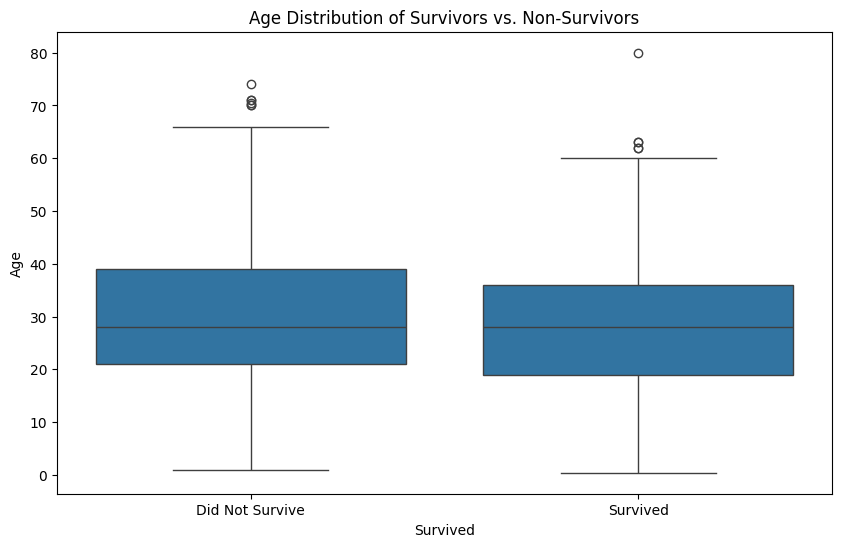

In [8]:
# Create a box plot for age distribution by survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  # Rename x-ticks for clarity
plt.show()

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.

<ipython-input-9-00cfc90b60a1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_sex_dist = titanic_data.groupby(['class', 'survived']).size().unstack()


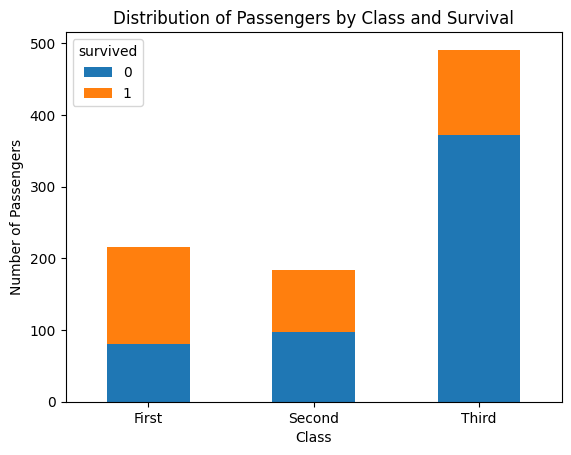

In [9]:
import matplotlib.pyplot as plt

# Visualize the distribution of passengers based on class and sex using bar charts
class_sex_dist = titanic_data.groupby(['class', 'survived']).size().unstack()

# Plot the bar chart
class_sex_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of Passengers by Class and Survival')
plt.ylabel('Number of Passengers')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.show()

**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:**

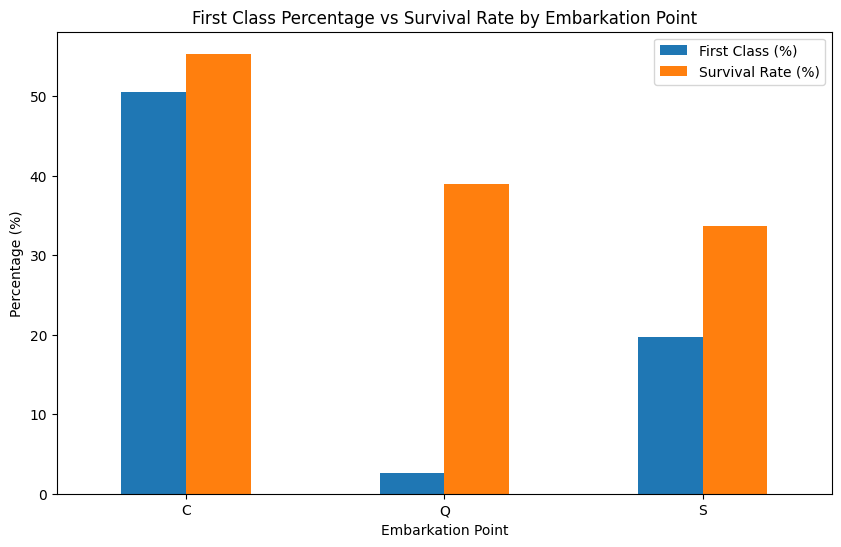

In [10]:
# Optional: if you have code to support your Q1 discussion, please add it here.

first_class_percentage = (
    titanic_data[titanic_data['class'] == 'First']
    .groupby('embarked')
    .size() / titanic_data.groupby('embarked').size() * 100
)

survival_rate_by_embarked = titanic_data.groupby('embarked')['survived'].mean() * 100

comparison_df = pd.DataFrame({
    'First Class (%)': first_class_percentage,
    'Survival Rate (%)': survival_rate_by_embarked
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('First Class Percentage vs Survival Rate by Embarkation Point')
plt.ylabel('Percentage (%)')
plt.xlabel('Embarkation Point')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
plt.show()


#Not necesarily. The code above prints the class distribution by each port and
#compares it to the percentag of 1st class passengers from each port
#As shown below and from task 2, there isn't an exact correlation between the
#two factors as port C had a lot of 1st class passengers with the highest
#survival rate. However, port Q shows otherwise.
#In conclusion, no selecting Port C as your embarkment point will not
#necessarily increase your chances of survival. There are many other factors
#that may have contributed to survival rate such as gender, age, companions, etc.

Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:**

In [13]:
# Optional: if you have code to support your Q2 discussion, please add it here.
#No, again there are many factors that play a roll into ones survival from the
#titanic. The code below calculates the percentage of passengers in each
#class who are senior passengers. Next to it is the survival rate of senior
#passengers in each class. So it's not that senior passengers weren't taken
#care of, but they had the lowest survival rate due to age and physical limitations

titanic_data = sns.load_dataset('titanic')

bins = [0, 12, 20, 40, 60, float('inf')]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

senior_passengers = titanic_data[titanic_data['age_group'] == 'Senior']

total_passengers_by_class = titanic_data['class'].value_counts()
senior_passengers_by_class = senior_passengers['class'].value_counts()
senior_percentage_by_class = (senior_passengers_by_class / total_passengers_by_class) * 100

senior_survival_rate_by_class = senior_passengers.groupby('class')['survived'].mean() * 100

senior_comparison_df = pd.DataFrame({
    'Senior Passenger Percentage (%)': senior_percentage_by_class,
    'Senior Survival Rate (%)': senior_survival_rate_by_class
})

print(senior_comparison_df)


        Senior Passenger Percentage (%)  Senior Survival Rate (%)
class                                                            
First                          6.481481                 21.428571
Second                         1.630435                 33.333333
Third                          1.018330                 20.000000


<ipython-input-13-80825203d1ad>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senior_survival_rate_by_class = senior_passengers.groupby('class')['survived'].mean() * 100
